In [1]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
from datetime import datetime
import seaborn as sns


In [2]:
# Read the CSV file into a DataFrame
df = pd.read_csv('Resources/clean_data.csv')

# Display the first few rows of the DataFrame
df.head()

# Perform data analysis and visualization
# (add your analysis code here)


,Unnamed: 0,cc_num,merchant,category,amt,first,last,gender,street,city,...,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud,Transaction Date,Time,Age
0,0,2291160000000000,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,...,333497,Mechanical engineer,3/19/1968,2da90c7d74bd46a0caf3777415b3ebd3,33.986391,-81.200714,0,21/06/2020,12:14,56
1,1,3573030000000000,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,...,302,"Sales professional, IT",1/17/1990,324cc204407e99f51b0d6ca0055005e7,39.450498,-109.960431,0,21/06/2020,12:14,34
2,2,3598220000000000,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,...,34496,"Librarian, public",10/21/1970,c81755dbbbea9d5c77f094348a7579be,40.495810,-74.196111,0,21/06/2020,12:14,54
3,3,3591920000000000,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,...,54767,Set designer,7/25/1987,2159175b9efe66dc301f149d3d5abf8c,28.812398,-80.883061,0,21/06/2020,12:15,37
4,4,3526830000000000,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,...,1126,Furniture designer,7/6/1955,57ff021bd3f328f8738bb535c302a31b,44.959148,-85.884734,0,21/06/2020,12:15,69


Average age of credit card fraud victims: 52.74


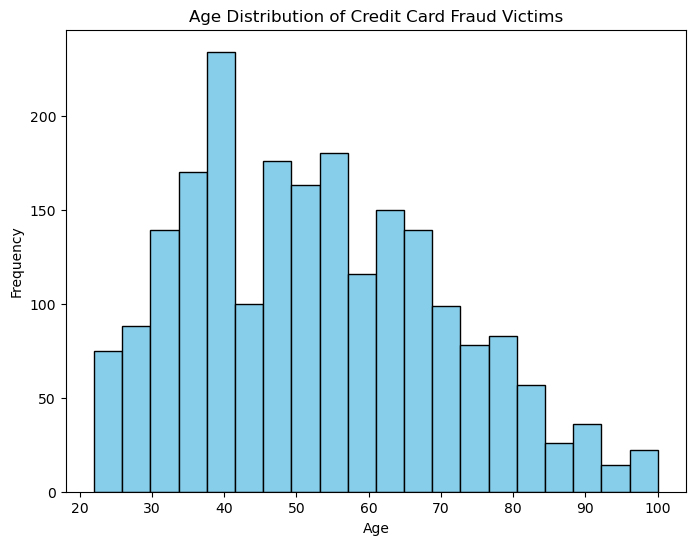

In [3]:
# Filter fraud transactions
fraudulent_transactions = df[df['is_fraud'] == 1]

# Calculate the average age of fraud victims
average_age_fraudulent = round(fraudulent_transactions['Age'].mean(), 2)
print("Average age of credit card fraud victims:", average_age_fraudulent)

plt.figure(figsize=(8, 6))
plt.hist(fraudulent_transactions['Age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution of Credit Card Fraud Victims')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()



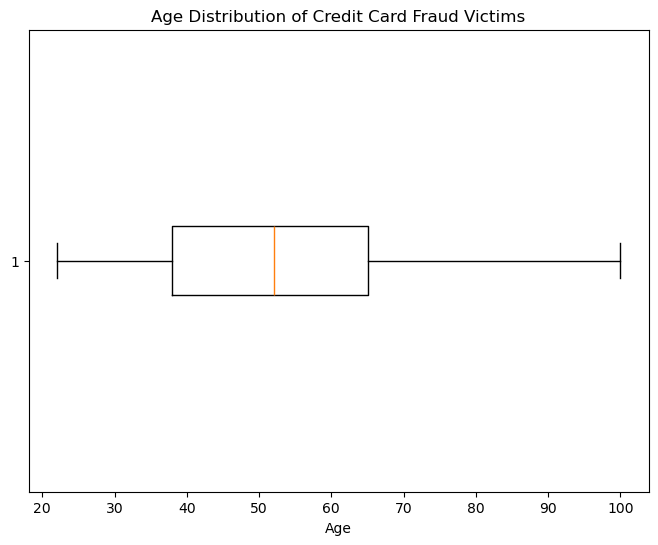

In [4]:
# Plot a box plot of ages for fraudulent transactions
plt.figure(figsize=(8, 6))
plt.boxplot(fraudulent_transactions['Age'], vert=False)
plt.title('Age Distribution of Credit Card Fraud Victims')
plt.xlabel('Age')
plt.grid(False)
plt.show()


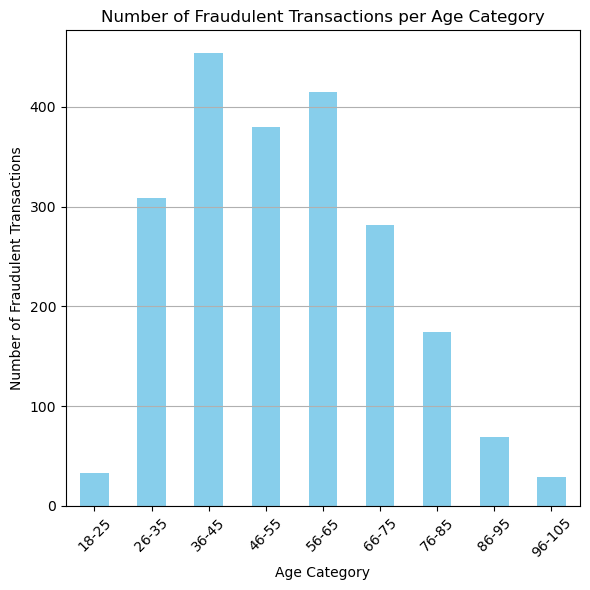

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Assume df is your DataFrame containing the credit card transaction data
# Define age categories
bins = [18, 25, 35, 45, 55, 65, 75, 85, 95, 105]
labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '66-75', '76-85', '86-95', '96-105']
df['age_category'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Filter fraudulent transactions
fraudulent_transactions = df[df['is_fraud'] == 1]

# Count fraudulent transactions per age category
fraud_per_age_category = fraudulent_transactions['age_category'].value_counts().sort_index()

# Visualize the results
fig, ax = plt.subplots(figsize=(6, 6))

# Plot fraudulent transactions per age category
fraud_per_age_category.plot(kind='bar', color='skyblue')
plt.title('Number of Fraudulent Transactions per Age Category')
plt.xlabel('Age Category')
plt.ylabel('Number of Fraudulent Transactions')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.tight_layout()
plt.show()


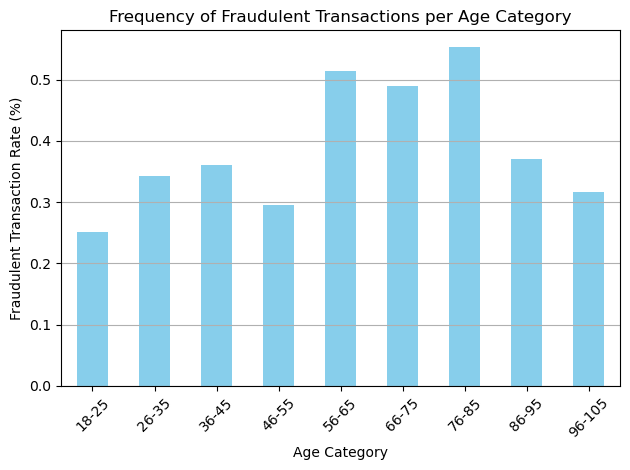

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Assume df is your DataFrame containing the credit card transaction data
# Define age categories
bins = [18, 25, 35, 45, 55, 65, 75, 85, 95, 105]
labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '66-75', '76-85', '86-95', '96-105']
df['age_category'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Count transactions per age category
transactions_per_age_category = df['age_category'].value_counts().sort_index()

# Filter fraudulent transactions
fraudulent_transactions = df[df['is_fraud'] == 1]

# Count fraudulent transactions per age category
fraud_per_age_category = fraudulent_transactions['age_category'].value_counts().sort_index()

# Calculate the rate of fraudulent transactions per age category
fraud_rate_per_age_category = (fraud_per_age_category / transactions_per_age_category) * 100

# Visualize the results
fraud_rate_per_age_category.plot(kind='bar', color='skyblue')
plt.title('Frequency of Fraudulent Transactions per Age Category')
plt.xlabel('Age Category')
plt.ylabel('Fraudulent Transaction Rate (%)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [19]:
from scipy.stats import chi2_contingency

# Assume df is your DataFrame containing the credit card transaction data
# Define age categories
bins = [18, 25, 35, 45, 55, 65, 75, 85, 95, 105]
labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '66-75', '76-85', '86-95', '96-105']
df['age_category'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Create a contingency table of age categories and fraudulent transactions
contingency_table = pd.crosstab(df['age_category'], df['is_fraud'])

# Perform chi-square test for independence
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Print results
print("Chi-square statistic:", chi2)
print("P-value:", p_value)
print(contingency_table)


Chi-square statistic: 115.09589699397517
P-value: 3.404172531724408e-21
is_fraud           0    1
age_category             
18-25          13138   33
26-35          90042  309
36-45         125403  454
46-55         128379  380
56-65          80312  415
66-75          57338  282
76-85          31300  174
86-95          18524   69
96-105          9138   29
